In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


In [2]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [3]:
df= pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')
testdf = pd.read_csv('/kaggle/input/playground-series-s5e12/test.csv')

In [4]:
df.sample(5)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
361105,361105,26,2,123,9.0,5.9,2.1,25.0,0.85,97,...,Female,White,Highschool,Middle,Former,Employed,0,0,0,0.0
29579,29579,57,1,82,5.4,7.0,3.3,24.4,0.85,129,...,Male,Black,Graduate,Middle,Never,Employed,1,1,0,1.0
395396,395396,55,2,58,6.4,8.3,3.9,28.9,0.91,114,...,Female,Hispanic,Graduate,Middle,Never,Employed,0,0,0,1.0
664626,664626,43,3,51,5.3,7.9,8.6,29.1,0.87,127,...,Male,White,Highschool,Lower-Middle,Current,Unemployed,1,0,0,1.0
583415,583415,53,2,51,6.5,5.9,7.1,25.2,0.85,113,...,Female,Hispanic,Graduate,Lower-Middle,Former,Student,0,0,0,0.0


In [5]:
df.shape

(700000, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

*no null value*

*Target column: diagnosed_diabetes*

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['diagnosed_diabetes'].value_counts(normalize=True)

diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64

*Mild Imbalance*

In [10]:
import matplotlib.pyplot as plt

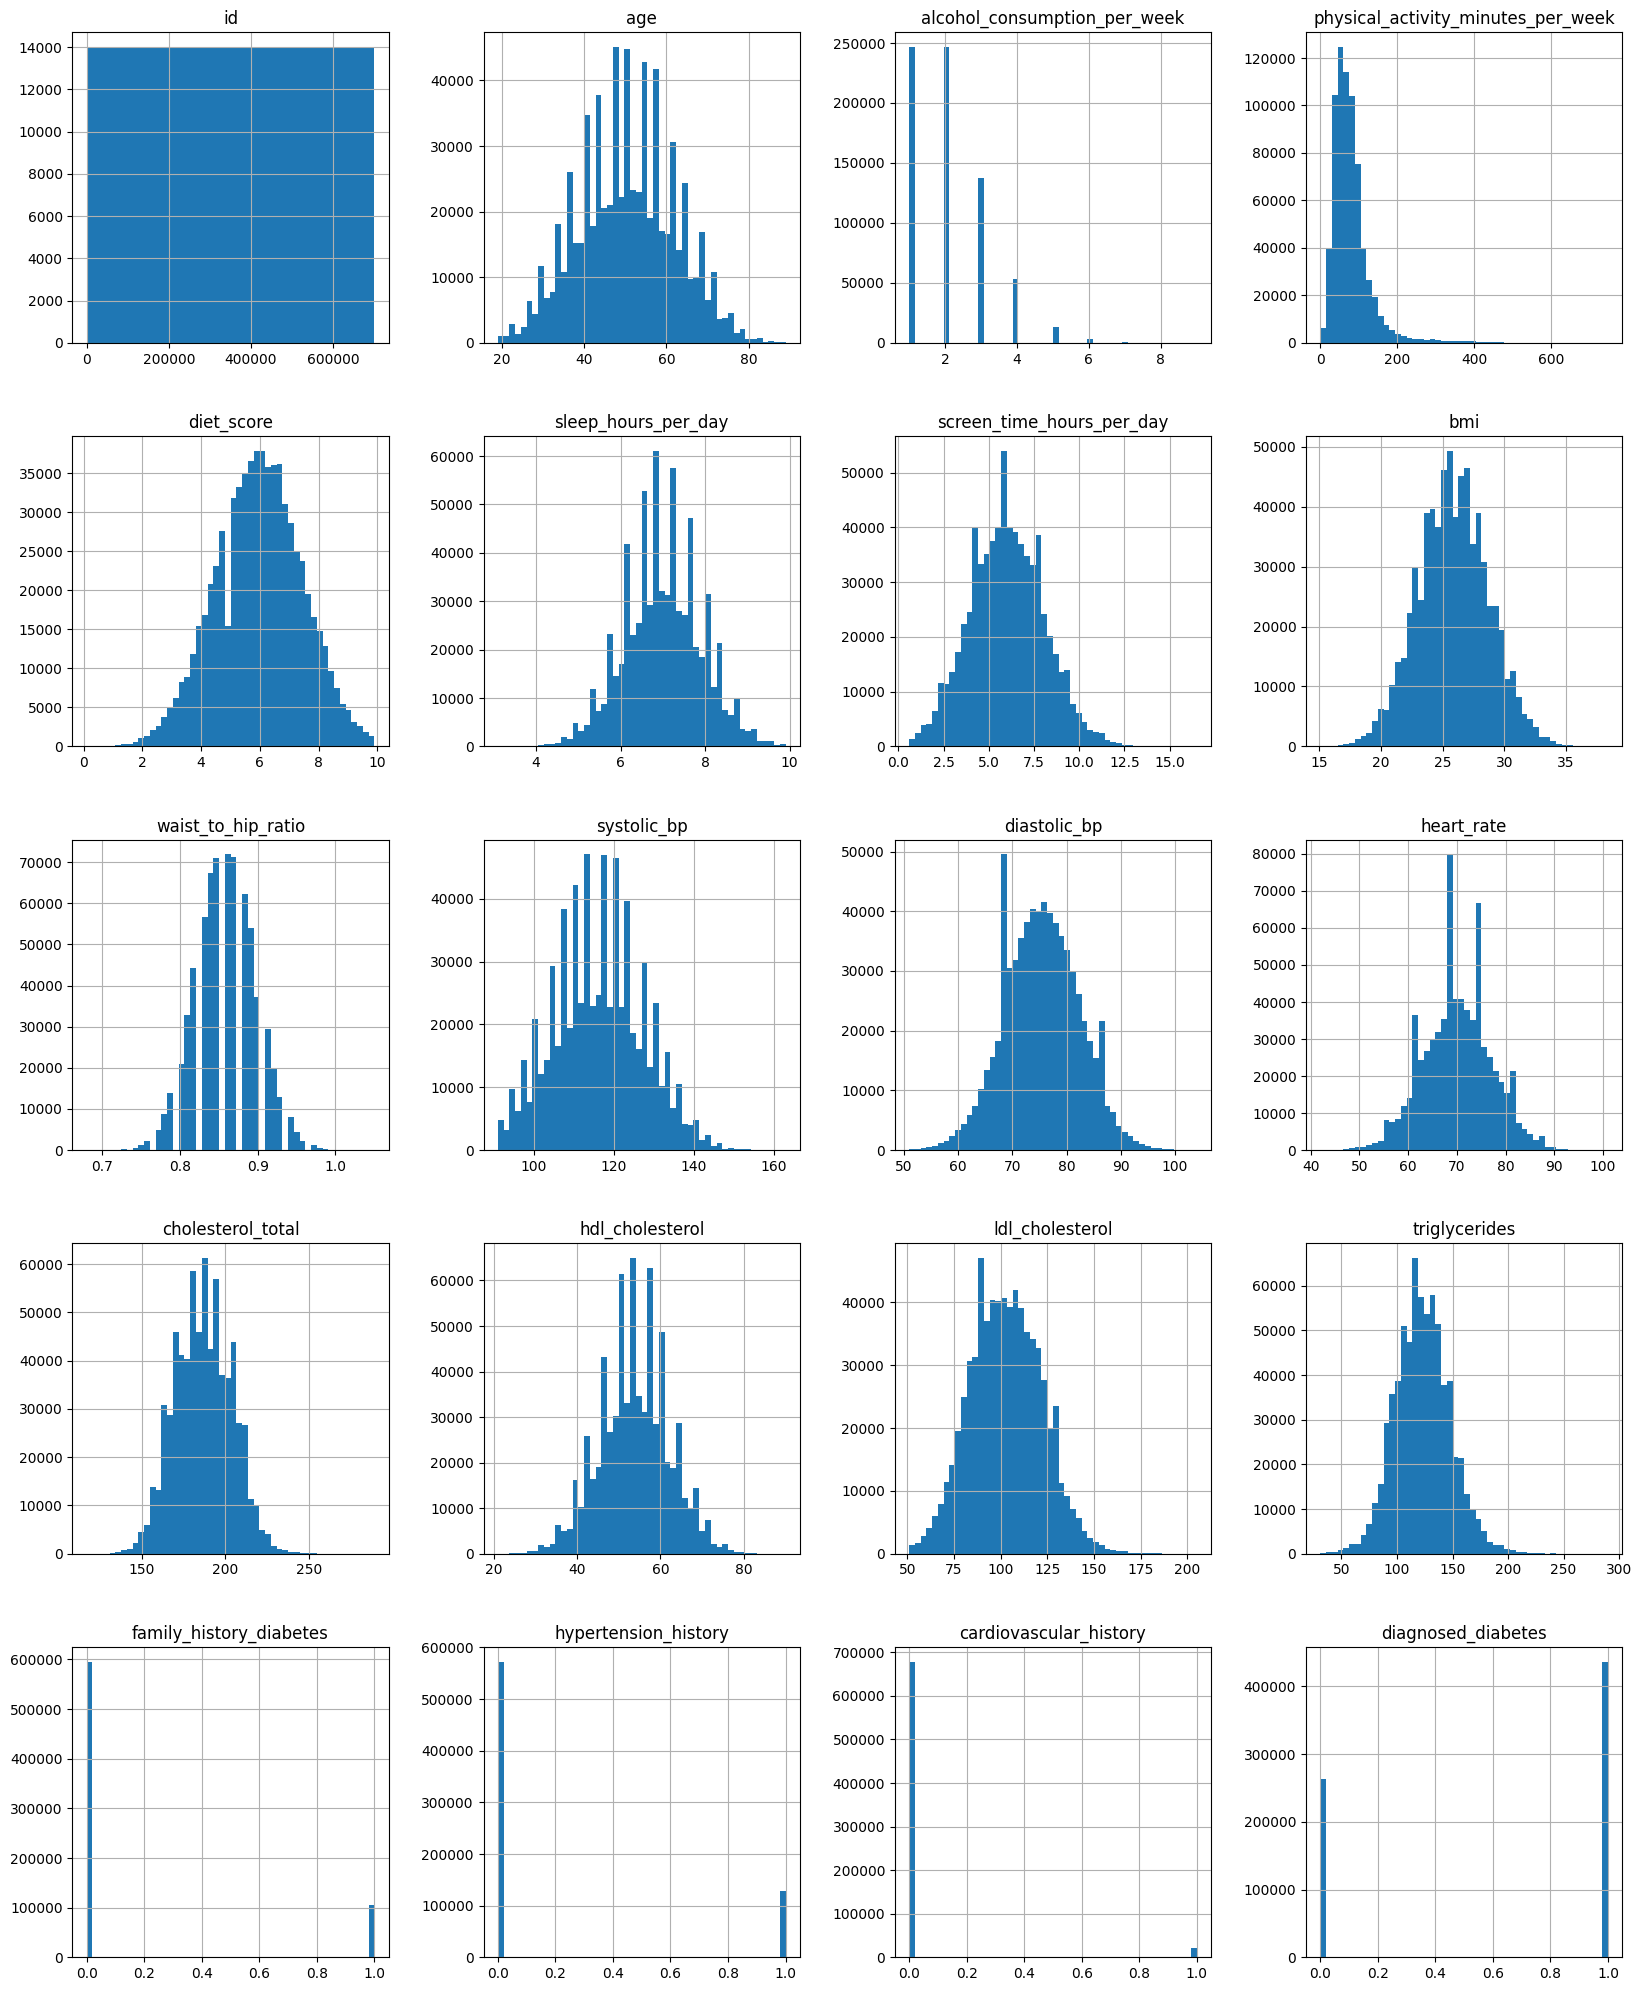

In [11]:
df.hist(bins=50,figsize=(20,25))
plt.show()

In [12]:
bins = [0, 18, 35, 60, 100]
names = ['Child', 'Young Adult', 'Middle-Aged', 'Senior']

# 3. Apply the pd.cut() function to create a new 'Age_Group' column
df['Age_Group'] = pd.cut(x=df['age'], bins=bins, labels=names)

df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes,Age_Group
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0,Young Adult
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0,Middle-Aged
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0,Young Adult
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0,Middle-Aged
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0,Middle-Aged


In [13]:
X= df.drop(columns=['diagnosed_diabetes','id'])
y= df['diagnosed_diabetes']

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(split.split(X, y))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [15]:
num_col = X_train.select_dtypes(include=['int64','float64']).columns
cat_col = X_train.select_dtypes(include=['object']).columns

In [16]:
signal = {}

for col in num_col:
    signal[col] = abs(
        df[df['diagnosed_diabetes']==1][col].mean()
        - df[df['diagnosed_diabetes']==0][col].mean()
    )

pd.Series(signal).sort_values(ascending=False)

physical_activity_minutes_per_week    17.938628
triglycerides                          4.627429
ldl_cholesterol                        4.034501
age                                    3.876572
cholesterol_total                      3.042328
systolic_bp                            2.434295
hdl_cholesterol                        0.908112
bmi                                    0.623314
diastolic_bp                           0.510929
heart_rate                             0.341735
family_history_diabetes                0.155277
diet_score                             0.151357
screen_time_hours_per_day              0.076026
hypertension_history                   0.023871
cardiovascular_history                 0.008757
sleep_hours_per_day                    0.006531
alcohol_consumption_per_week           0.006470
waist_to_hip_ratio                     0.006353
dtype: float64

In [17]:
# ---------------------------
# Medical Interactions
# ---------------------------
df["bmi_age"] = df["bmi"] * df["age"]
df["bp_product"] = df["systolic_bp"] * df["diastolic_bp"]
df["chol_ratio"] = df["ldl_cholesterol"] / (df["hdl_cholesterol"] + 1)
df["waist_bmi"] = df["waist_to_hip_ratio"] * df["bmi"]

# ---------------------------
# Binary Clinical Thresholds
# ---------------------------
df["obese"] = (df["bmi"] >= 30).astype(int)
df["high_bp"] = (
    (df["systolic_bp"] >= 140) | (df["diastolic_bp"] >= 90)
).astype(int)
df["low_hdl"] = (df["hdl_cholesterol"] < 40).astype(int)
df["high_ldl"] = (df["ldl_cholesterol"] >= 130).astype(int)
df["high_triglycerides"] = (df["triglycerides"] >= 150).astype(int)

# ---------------------------
# Lifestyle Risk Index
# ---------------------------
df["lifestyle_risk"] = (
    (df["alcohol_consumption_per_week"] > 7).astype(int) +
    (df["physical_activity_minutes_per_week"] < 150).astype(int) +
    (df["sleep_hours_per_day"] < 6).astype(int) +
    (df["screen_time_hours_per_day"] > 6).astype(int)
)

# ---------------------------
# Genetic + Cardio Interaction
# ---------------------------
df["genetic_cardiac_risk"] = (
    df["family_history_diabetes"] *
    (df["hypertension_history"] + df["cardiovascular_history"])
)




In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

ordinal_col = [ 'education_level',
       'smoking_status']

nominal_col = [col for col in cat_col if col not in ordinal_col]

In [19]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(
        categories=[
            ['No formal', 'Highschool', 'Graduate', 'Postgraduate'],
            ['Never', 'Former', 'Current']
        ]
    ))
])

nom_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_col),
    ('ord', ord_pipe, ordinal_col),
    ('nom', nom_pipe, nominal_col)
])


In [20]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score

# from catboost import CatBoostClassifier


In [21]:
# # Base models (NO preprocessing here)
# base_models = [
#     ("lr", LogisticRegression(max_iter=1000, class_weight="balanced")),
    
#     ("dt", DecisionTreeClassifier(
#         max_depth=4,
#         random_state=42
#     )),
    
#     ("cat", CatBoostClassifier(
#         iterations=300,
#         depth=6,
#         learning_rate=0.05,
#         verbose=False
#     ))
# ]

# # Meta model
# meta_model = LogisticRegression(max_iter=1000, class_weight="balanced")

# # Stacking model
# stack_model = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model,
#     cv=5,
#     passthrough=False,
#     n_jobs=-1
# )

# # FINAL PIPELINE (this is the key part)
# final_pipeline = Pipeline([
#     ("preprocessor", preprocessor),   # 👈 your existing preprocessing
#     ("model", stack_model)
# ])

# # Train
# final_pipeline.fit(X_train, y_train)

# # Evaluate
# y_pred = final_pipeline.predict(X_test)
# y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


In [22]:
from catboost import CatBoostClassifier

rf_model = Pipeline([
    ('prep',preprocessor),
    ('model',CatBoostClassifier(
    n_estimators=2000, 
    learning_rate=0.05, 
    depth=6,
    random_state=42, 
    eval_metric='AUC', 
    early_stopping_rounds=50,))
])

rf_model.fit(X_train, y_train)

# probabilities, not labels
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
y_train_prob = rf_model.predict_proba(X_train)[:, 1]

auc_val = roc_auc_score(y_test, y_test_prob)
auc_train = roc_auc_score(y_train, y_train_prob)

print("Train AUC:", auc_train)
print("Test AUC:", auc_val)

0:	total: 126ms	remaining: 4m 11s
1:	total: 191ms	remaining: 3m 10s
2:	total: 257ms	remaining: 2m 51s
3:	total: 318ms	remaining: 2m 38s
4:	total: 380ms	remaining: 2m 31s
5:	total: 443ms	remaining: 2m 27s
6:	total: 505ms	remaining: 2m 23s
7:	total: 568ms	remaining: 2m 21s
8:	total: 633ms	remaining: 2m 20s
9:	total: 695ms	remaining: 2m 18s
10:	total: 757ms	remaining: 2m 16s
11:	total: 820ms	remaining: 2m 15s
12:	total: 883ms	remaining: 2m 14s
13:	total: 945ms	remaining: 2m 14s
14:	total: 1.01s	remaining: 2m 13s
15:	total: 1.08s	remaining: 2m 13s
16:	total: 1.14s	remaining: 2m 12s
17:	total: 1.21s	remaining: 2m 12s
18:	total: 1.27s	remaining: 2m 12s
19:	total: 1.33s	remaining: 2m 11s
20:	total: 1.4s	remaining: 2m 11s
21:	total: 1.46s	remaining: 2m 11s
22:	total: 1.52s	remaining: 2m 11s
23:	total: 1.59s	remaining: 2m 11s
24:	total: 1.65s	remaining: 2m 10s
25:	total: 1.71s	remaining: 2m 9s
26:	total: 1.77s	remaining: 2m 9s
27:	total: 1.84s	remaining: 2m 9s
28:	total: 1.91s	remaining: 2m 9s


In [23]:
# ---------------------------
# Medical Interactions
# ---------------------------
testdf["bmi_age"] = testdf["bmi"] * testdf["age"]
testdf["bp_product"] = testdf["systolic_bp"] * testdf["diastolic_bp"]
testdf["chol_ratio"] = testdf["ldl_cholesterol"] / (testdf["hdl_cholesterol"] + 1)
testdf["waist_bmi"] = testdf["waist_to_hip_ratio"] * testdf["bmi"]

# ---------------------------
# Binary Clinical Thresholds
# ---------------------------
testdf["obese"] = (testdf["bmi"] >= 30).astype(int)
testdf["high_bp"] = (
    (testdf["systolic_bp"] >= 140) | (testdf["diastolic_bp"] >= 90)
).astype(int)
testdf["low_hdl"] = (testdf["hdl_cholesterol"] < 40).astype(int)
testdf["high_ldl"] = (testdf["ldl_cholesterol"] >= 130).astype(int)
testdf["high_triglycerides"] = (testdf["triglycerides"] >= 150).astype(int)

# ---------------------------
# Lifestyle Risk Index
# ---------------------------
testdf["lifestyle_risk"] = (
    (testdf["alcohol_consumption_per_week"] > 7).astype(int) +
    (testdf["physical_activity_minutes_per_week"] < 150).astype(int) +
    (testdf["sleep_hours_per_day"] < 6).astype(int) +
    (testdf["screen_time_hours_per_day"] > 6).astype(int)
)

# ---------------------------
# Genetic + Cardio Interaction
# ---------------------------
testdf["genetic_cardiac_risk"] = (
    testdf["family_history_diabetes"] *
    (testdf["hypertension_history"] + testdf["cardiovascular_history"])
)


In [24]:
test_proba = rf_model.predict_proba(testdf)[:, 1]

In [25]:
submission = pd.DataFrame({
    'id': testdf['id'],
    'diagnosed_diabetes': test_proba
})
submission.to_csv('submission.csv', index=False)